In [1]:
import keras
keras.__version__

import os, shutil

base_dir = 'fashion_data'

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

ClothesList = ['bottom_jean_dark_plain', 'bottom_jean_dark_ripped', 'bottom_jean_light_plain', 'bottom_jean_light_ripped',
             'bottom_pants_black_etc', 'bottom_pants_black_plain', 'bottom_pants_brown_etc',
             'bottom_pants_brown_plain', 'bottom_pants_green_etc', 'bottom_pants_green_plain',
             'bottom_pants_grey_etc', 'bottom_pants_grey_plain', 'bottom_pants_white_etc',
             'bottom_pants_white_plain']

for cl in ClothesList :
    globals()['train_{}'.format(cl)] = os.path.join(train_dir, cl)
    
for cl in ClothesList :
    globals()['validation_{}'.format(cl)] = os.path.join(validation_dir, cl)
    
for cl in ClothesList :
    globals()['test_{}'.format(cl)] = os.path.join(test_dir, cl)

Using TensorFlow backend.


In [2]:
from keras.applications import ResNet50
from keras.layers import Dense, Input, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization

In [3]:
conv_base = ResNet50(weights = 'imagenet',
                    include_top = False,
                    input_shape = (150,150,3))

c:\users\82104\anaconda3\envs\py36\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [4]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(14, activation='softmax'))

In [5]:
print('conv_base를 동결하기 전 훈련되는 가중치의 수:', 
      len(model.trainable_weights))
conv_base.trainable = False
print('conv_base를 동결한 후 훈련되는 가중치의 수:', 
      len(model.trainable_weights))

conv_base를 동결하기 전 훈련되는 가중치의 수: 216
conv_base를 동결한 후 훈련되는 가중치의 수: 4


In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지의 크기를 150 × 150로 변경합니다
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=200,
      epochs=300,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 830 images belonging to 14 classes.
Found 280 images belonging to 14 classes.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
 - 44s - loss: 0.8872 - acc: 0.7379 - val_loss: 3.1031 - val_acc: 0.0141
Epoch 2/100
 - 40s - loss: 0.4439 - acc: 0.8607 - val_loss: 3.5839 - val_acc: 0.0586
Epoch 3/100
 - 40s - loss: 0.3620 - acc: 0.8896 - val_loss: 3.7832 - val_acc: 0.0154
Epoch 4/100
 - 40s - loss: 0.3277 - acc: 0.8995 - val_loss: 4.9971 - val_acc: 0.0741
Epoch 5/100
 - 40s - loss: 0.2708 - acc: 0.9160 - val_loss: 4.9554 - val_acc: 0.0737
Epoch 6/100
 - 40s - loss: 0.2586 - acc: 0.9219 - val_loss: 6.3215 - val_acc: 0.0683
Epoch 7/100
 - 40s - loss: 0.2386 - acc: 0.9259 - val_loss: 5.9890 - val_acc: 0.0731
Epoch 8/100
 - 40s - loss: 0.2179 - acc: 0.9345 - val_loss: 6.6561 - val_acc: 0.0696
Epoch 9/100
 - 40s - loss: 0.2065 - acc: 0.9414 - val_loss: 6.3334 - val_acc: 0.0722
Epoch 10/100
 - 40s - loss: 0.2093 - acc: 0.9377 - val_l

Epoch 89/100
 - 40s - loss: 0.0615 - acc: 0.9857 - val_loss: 13.7251 - val_acc: 0.0702
Epoch 90/100
 - 40s - loss: 0.0612 - acc: 0.9859 - val_loss: 13.8349 - val_acc: 0.0722
Epoch 91/100
 - 40s - loss: 0.0670 - acc: 0.9870 - val_loss: 13.8780 - val_acc: 0.0731
Epoch 92/100
 - 40s - loss: 0.0661 - acc: 0.9842 - val_loss: 13.4025 - val_acc: 0.0696
Epoch 93/100
 - 40s - loss: 0.0658 - acc: 0.9837 - val_loss: 13.6269 - val_acc: 0.0712
Epoch 94/100
 - 40s - loss: 0.0597 - acc: 0.9856 - val_loss: 13.5212 - val_acc: 0.0715
Epoch 95/100
 - 41s - loss: 0.0789 - acc: 0.9832 - val_loss: 13.2120 - val_acc: 0.0724
Epoch 96/100
 - 40s - loss: 0.0556 - acc: 0.9862 - val_loss: 13.0472 - val_acc: 0.0722
Epoch 97/100
 - 40s - loss: 0.0614 - acc: 0.9859 - val_loss: 13.4688 - val_acc: 0.0692
Epoch 98/100
 - 40s - loss: 0.0584 - acc: 0.9859 - val_loss: 13.3845 - val_acc: 0.0741
Epoch 99/100
 - 40s - loss: 0.0470 - acc: 0.9883 - val_loss: 13.5399 - val_acc: 0.0696
Epoch 100/100
 - 41s - loss: 0.0599 - acc: 

In [7]:
model.save('1201_pantsmodel_1.h5')

In [8]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-3),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=200,
      epochs=300,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
200/200 [==============================] - 43s 215ms/step - loss: 5.4885 - acc: 0.6301 - val_loss: 5.2361 - val_acc: 0.6379
Epoch 2/100
200/200 [==============================] - 41s 204ms/step - loss: 4.1623 - acc: 0.7198 - val_loss: 5.4464 - val_acc: 0.6333
Epoch 3/100
200/200 [==============================] - 41s 204ms/step - loss: 3.7973 - acc: 0.7494 - val_loss: 5.3400 - val_acc: 0.6379
Epoch 4/100
200/200 [==============================] - 41s 203ms/step - loss: 3.7138 - acc: 0.7533 - val_loss: 5.1953 - val_acc: 0.6564
Epoch 5/100
200/200 [==============================] - 41s 204ms/step - loss: 3.5708 - acc: 0.7656 - val_loss: 6.7543 - val_acc: 0.5612
Epoch 6/100
200/200 [==============================] - 41s 203ms/step - loss: 3.6998 - acc: 0.7596 - val_loss: 6.3002 - val_acc: 0.5968
Epoch 7/100
200/200 [==============================] - 41s 203ms/step - loss: 3.4407 - acc: 0.7762 - val_loss: 5.4713 - val_acc: 0.6443
Epoch 8/100
200/200 [===========================

200/200 [==============================] - 41s 205ms/step - loss: 1.5317 - acc: 0.9012 - val_loss: 3.8700 - val_acc: 0.7545
Epoch 61/100
200/200 [==============================] - 41s 204ms/step - loss: 1.6371 - acc: 0.8947 - val_loss: 4.4678 - val_acc: 0.7152
Epoch 62/100
200/200 [==============================] - 41s 204ms/step - loss: 1.5463 - acc: 0.9001 - val_loss: 3.9811 - val_acc: 0.7384
Epoch 63/100
200/200 [==============================] - 41s 206ms/step - loss: 1.5499 - acc: 0.8999 - val_loss: 4.6243 - val_acc: 0.7077
Epoch 64/100
200/200 [==============================] - 41s 204ms/step - loss: 1.5832 - acc: 0.8974 - val_loss: 3.9543 - val_acc: 0.7539
Epoch 65/100
200/200 [==============================] - 41s 205ms/step - loss: 1.5349 - acc: 0.9019 - val_loss: 4.3258 - val_acc: 0.7244
Epoch 66/100
200/200 [==============================] - 41s 205ms/step - loss: 1.4765 - acc: 0.9057 - val_loss: 4.1722 - val_acc: 0.7313
Epoch 67/100
200/200 [==============================] 

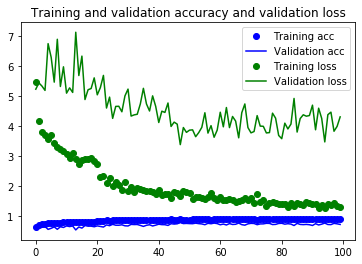

<Figure size 432x288 with 0 Axes>

In [13]:
import matplotlib as mpl
import matplotlib.pylab as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

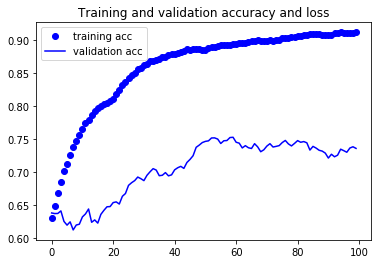

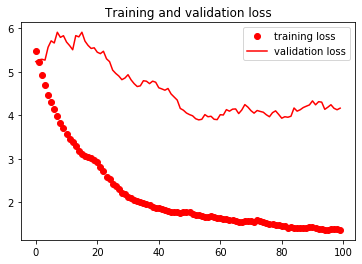

In [34]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'ro', label='training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'r', label='validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [12]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 140 images belonging to 14 classes.
test acc: 0.7460000002384186


In [16]:
print('훈련 bottom_jean_dark_plain:', len(os.listdir(test_bottom_jean_dark_plain)))
print('훈련 bottom_jean_dark_ripped', len(os.listdir(test_bottom_jean_dark_ripped)))
print('훈련 bottom_jean_light_plain:', len(os.listdir(test_bottom_jean_light_plain)))
print('훈련 bottom_jean_light_ripeed:', len(os.listdir(test_bottom_jean_light_ripped)))
print('훈련 bottom_pants_black_plain:', len(os.listdir(test_bottom_pants_black_plain)))
print('훈련 bottom_pants_black_plain:', len(os.listdir(test_bottom_pants_black_etc)))
print('훈련 bottom_pants_brown_plain:', len(os.listdir(test_bottom_pants_brown_plain)))
print('훈련 bottom_pants_brown_plain:', len(os.listdir(test_bottom_pants_brown_etc)))
print('훈련 bottom_pants_green_plain:', len(os.listdir(test_bottom_pants_green_plain)))
print('훈련 bottom_pants_green_plain:', len(os.listdir(test_bottom_pants_green_etc)))
print('훈련 bottom_pants_grey_plain:', len(os.listdir(test_bottom_pants_grey_plain)))
print('훈련 bottom_pants_grey_plain:', len(os.listdir(test_bottom_pants_grey_etc)))
print('훈련 bottom_pants_white_plain:', len(os.listdir(test_bottom_pants_white_plain)))
print('훈련 bottom_pants_white_plain:', len(os.listdir(test_bottom_pants_white_etc)))



훈련 bottom_jean_dark_plain: 10
훈련 bottom_jean_dark_ripped 10
훈련 bottom_jean_light_plain: 10
훈련 bottom_jean_light_ripeed: 10
훈련 bottom_pants_black_plain: 10
훈련 bottom_pants_black_plain: 10
훈련 bottom_pants_brown_plain: 10
훈련 bottom_pants_brown_plain: 10
훈련 bottom_pants_green_plain: 10
훈련 bottom_pants_green_plain: 10
훈련 bottom_pants_grey_plain: 10
훈련 bottom_pants_grey_plain: 10
훈련 bottom_pants_white_plain: 10
훈련 bottom_pants_white_plain: 10


In [32]:
#from PIL import Image

#image = Image.open('test.jpg')
#resize_image = image.resize((150,150))
#resize_image.save('test2.jpg')

test_img = plt.imread('test2.jpg')
test_img = test_img[:,:,0]
test_img = (test_img > 125) * test_img
test_img = test_img.astype('float32') / 255.

#plt.imshow(test_img, cmap='Greys', interpolation='nearest');
test_img = test_img.reshape((1,150, 150, 1))

ValueError: cannot reshape array of size 22500 into shape (3,150,150,1)

In [30]:
test_img = plt.imread('test2.jpg')
test_img = test_img[:,:,0]
test_img = (test_img > 125) * test_img
test_img = test_img.astype('float32') / 255.

#plt.imshow(test_img, cmap='Greys', interpolation='nearest');
test_img = test_img.reshape((1,150, 150, 1))

print('The Answer is ', model.predict_classes(test_img))

ValueError: Error when checking input: expected resnet50_input to have 4 dimensions, but got array with shape (150, 150)

In [28]:
model.summary

<bound method Network.summary of <keras.engine.sequential.Sequential object at 0x000002D97E27B160>>